In [1]:
from bbg_function import *
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import Image, display

#### Download SPX Data 

In [2]:
ticket = "SPX:IND"
df = ohlc_price(ticket,timeframe='6_MONTH').dropna()

#### Grafico de vela 

In [3]:
fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['OPEN'],
                high=df['HIGH'],
                low=df['LOW'],
                close=df['PX_LAST'])])
fig.update_layout(
    title='SPX Index 6 Month',
    yaxis_title='SPX:IND',
)
fig.update_xaxes(
        rangeslider_visible=True,
        rangebreaks=[
            dict(bounds=["sat", "mon"]),  # hide weekends, eg. hide sat to before mon
        ]
)
fig.show()

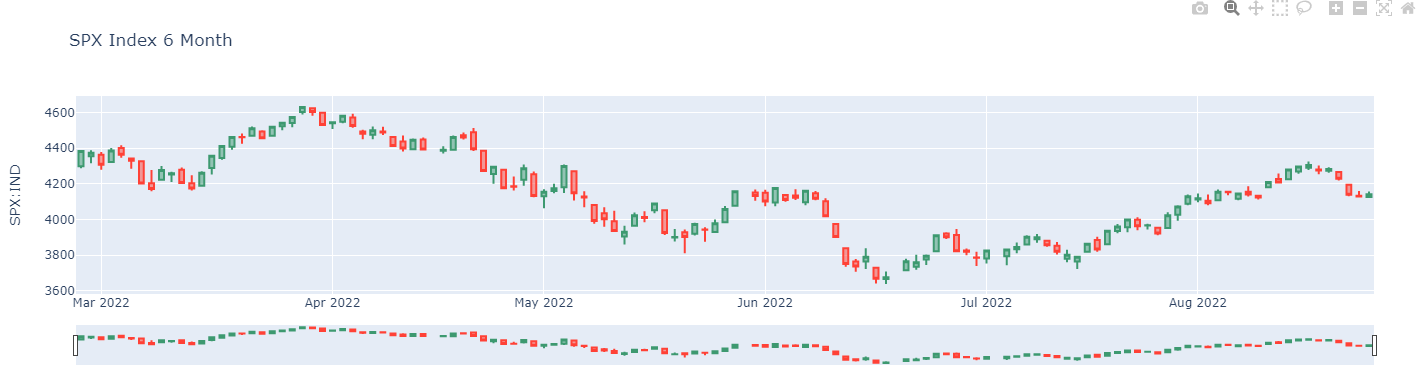

In [4]:
display(Image(filename='img/candlestick.PNG', embed=True))

#### Grafico Precio y volumen transado para una acción

In [5]:
df = last_price('META:US', timeframe='6_MONTH')

In [6]:
fig = make_subplots(rows=1, cols=1,specs=[[{"secondary_y": True}]])
fig.add_trace(go.Bar(name='Volumen META',x=df.index, y=df[df.columns[1]]))
fig.add_trace(go.Scatter(name='Precio META',x=df.index, y=df[df.columns[0]]),secondary_y=True)
fig.update_layout(title_text='Precio y Volumen META:US')
fig.update_yaxes(title_text="Volumen Transado", secondary_y=False, row=1)
fig.update_yaxes(title_text="Precio Cierre", secondary_y=True, row=1)
fig.update_xaxes(
        rangeslider_visible=True,
        rangebreaks=[
            dict(bounds=["sat", "mon"]),  # hide weekends, eg. hide sat to before mon
        ]
)
fig.show()

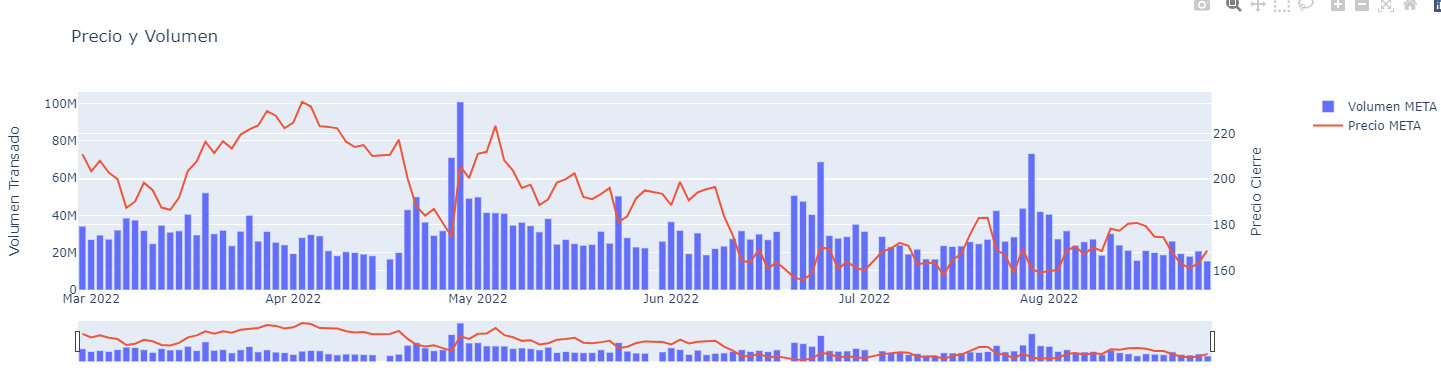

In [7]:
display(Image(filename='img/Metaprice.PNG', embed=True))